In [1]:
import pandas as pd
train = pd.read_csv('train.csv', index_col=0)
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

train.columns
train.shape

(1460, 80)

In [79]:
pd.set_option('display.max_columns', None)  #SHOW ALL COLUMNS

In [80]:
train.sample(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
343           90       RL          NaN     8544   Pave   NaN      Reg   
600          160       RM         24.0     1950   Pave   NaN      Reg   
227           60       RL         82.0     9950   Pave   NaN      IR1   
783           20       RL         67.0    16285   Pave   NaN      IR2   
455           90       RL         63.0     9297   Pave   NaN      Reg   
690          120       RL         61.0     7577   Pave   NaN      IR1   
1097          70       RM         60.0     6882   Pave   NaN      Reg   
693           60       RL         42.0    26178   Pave   NaN      IR1   
592           60       RL         97.0    13478   Pave   NaN      IR1   
718           20       RL         80.0    10000   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
Id                                                                       
343          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
600          Lvl    AllPub    Inside       Gtl      Blueste       Norm   
227          Lvl    AllPub    Inside       Gtl      NoRidge       Norm   
783          Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
455          Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
690          Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
1097         Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
693          Lvl    AllPub    Inside       Mod       Timber       Norm   
592          Lvl    AllPub    Corner       Gtl      NridgHt       Norm   
718          Lvl    AllPub    Inside       Gtl       NWAmes       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id                                                                         
343        Norm   Duplex     1Story            3            4       1949   
600        Norm    Twnhs     2Story            6            6       1980   
227        Norm     1Fam     2Story            7            5       1995   
783        Norm     1Fam     1Story            7            5       2001   
455        Norm   Duplex     1Story            5            5       1976   
690        Norm   TwnhsE     1Story            6            5       2005   
1097       Norm     1Fam     2Story            6            7       1914   
693        Norm     1Fam     2Story            7            5       1989   
592        Norm     1Fam     2Story           10            5       2008   
718        Norm     1Fam     1Story            5            6       1973   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
Id                                                                         
343           1950     Gable  CompShg      Stucco      Stucco    BrkFace   
600           1980     Gable  CompShg     MetalSd     MetalSd       None   
227           1995     Gable  CompShg     VinylSd     VinylSd    BrkFace   
783           2002     Gable  CompShg     VinylSd     VinylSd       None   
455           1976     Gable  CompShg     Plywood     Plywood       None   
690           2006     Gable  CompShg     VinylSd     VinylSd      Stone   
1097          2006     Gable  CompShg     Wd Sdng     Wd Sdng       None   
693           1990       Hip  CompShg     MetalSd     MetalSd    BrkFace   
592           2008     Gable  CompShg     CemntBd     CmentBd      Stone   
718           2000     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
Id                                                                  
343        340.0        TA        TA       Slab      NaN      NaN   
600          0.0        TA        Gd     CBlock       Gd       TA   
227        290.0        Gd        TA      PConc       Gd       TA   
783          0.0        Gd        TA      PConc       Gd       TA   


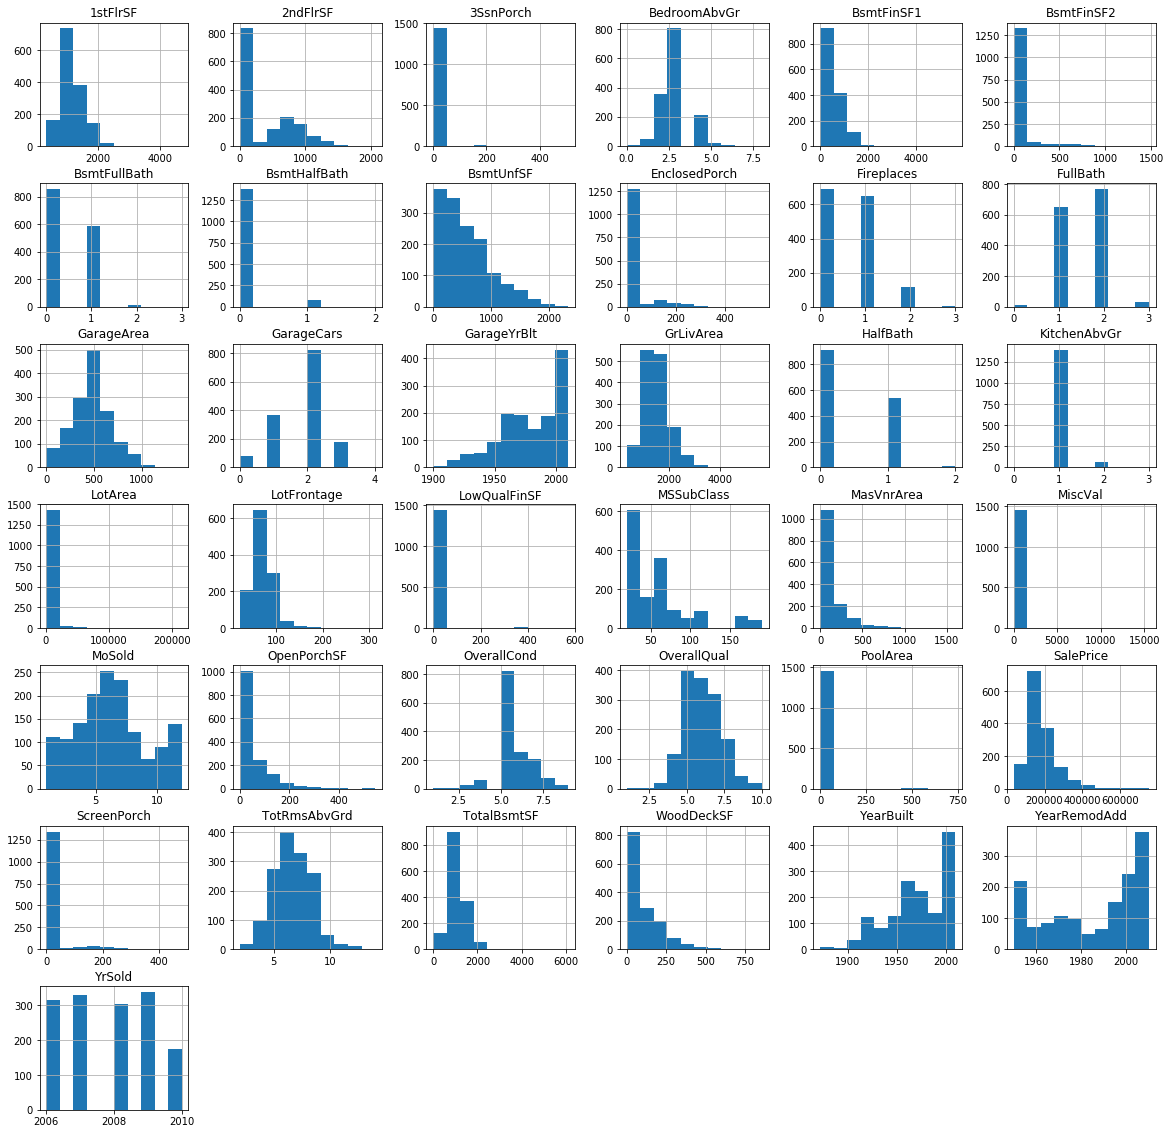

In [6]:
train.hist(figsize=(20,20))
plt.show()

In [28]:
y = train.SalePrice
x = train.drop('SalePrice', 1)
#plt.scatter(x, y)
len(x)==len(y)

True

In [56]:
nosecond = train['2ndFlrSF']!=0

In [68]:
nosecnd = train[nosecond]

In [72]:
nosecnd.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [73]:
nosecnd['1stFlrSF'].corr(nosecnd['2ndFlrSF'])

0.4362305866005976

In [82]:
nosecnd.corr()['SalePrice']

MSSubClass      -0.250264
LotFrontage      0.429357
LotArea          0.284315
OverallQual      0.744909
OverallCond     -0.049152
YearBuilt        0.461103
YearRemodAdd     0.455584
MasVnrArea       0.464953
BsmtFinSF1       0.392371
BsmtFinSF2       0.009790
BsmtUnfSF        0.169825
TotalBsmtSF      0.596496
1stFlrSF         0.604129
2ndFlrSF         0.673305
LowQualFinSF     0.022560
GrLivArea        0.735626
BsmtFullBath     0.266433
BsmtHalfBath    -0.009249
FullBath         0.540012
HalfBath         0.354359
BedroomAbvGr     0.237972
KitchenAbvGr    -0.175197
TotRmsAbvGrd     0.532773
Fireplaces       0.459591
GarageYrBlt      0.414630
GarageCars       0.643650
GarageArea       0.635744
WoodDeckSF       0.337181
OpenPorchSF      0.285292
EnclosedPorch   -0.171833
3SsnPorch        0.015288
ScreenPorch      0.110710
PoolArea         0.149135
MiscVal         -0.022401
MoSold           0.027253
YrSold          -0.069832
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [76]:
train.corr()['SalePrice']

MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [85]:
train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [87]:
418+220+148+133+74+430

1423

In [114]:
num_vals = [x for x in train.columns if train[x].dtype == 'int64' or train[x].dtype == 'float64'] 
num_df = train[num_vals]
num_df.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [19]:
num_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

In [26]:
num_df[num_df['LotFrontage'] < 300].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1199.000000  1199.000000    1199.000000  1199.000000  1199.000000   
mean     57.226856    69.644704    9891.954128     6.118432     5.561301   
std      43.128920    22.181762    7759.314333     1.415742     1.094547   
min      20.000000    21.000000    1300.000000     1.000000     2.000000   
25%      20.000000    59.000000    7417.500000     5.000000     5.000000   
50%      50.000000    69.000000    9250.000000     6.000000     5.000000   
75%      70.000000    80.000000   11241.500000     7.000000     6.000000   
max     190.000000   182.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1199.000000   1199.000000  1193.000000  1199.000000  1199.000000   
mean   1970.557965   1985.152627   102.208718   422.713928    43.047540   
std      31.756951     21.194998   184.445535   439.848427   154.612382   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1950.000000   1965.500000     0.000000     0.000000     0.000000   
50%    1972.000000   1995.000000     0.000000   351.000000     0.000000   
75%    2003.000000   2004.000000   160.000000   690.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  2260.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1199.000000  1199.000000    1199.000000  1199.000000   
mean       ...          89.259383    45.787323      22.768974     3.130942   
std        ...         120.402145    65.736388      61.704267    28.798860   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    24.000000       0.000000     0.000000   
75%        ...         168.000000    66.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea      MiscVal       MoSold       YrSold  \
count  1199.000000  1199.000000  1199.000000  1199.000000  1199.000000   
mean     15.053378     2.343620    25.532944     6.342786  2007.802335   
std      56.029465    36.369285   189.938155     2.698252     1.331572   
min       0.000000     0.000000     0.000000     1.000000  2006.000000   
25%       0.000000     0.000000     0.000000     5.000000  2007.000000   
50%       0.000000     0.000000     0.000000     6.000000  2008.000000   
75%       0.000000     0.000000     0.000000     8.000000  2009.000000   
max     480.000000   648.000000  3500.000000    12.000000  2010.000000   

           SalePrice  
count    1199.000000  
mean   180736.736447  
std     83438.182989  
min     34900.000000  
25%    127500.000000  
50%    159434.000000  
75%    213495.000000  
max    755000.000000  

[8 rows x 37 columns]

In [29]:
num_df[num_df['LotArea'] < 200000].describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1459.000000  1200.000000    1459.000000  1459.000000  1459.000000   
mean     56.922550    69.983333   10376.507197     6.098698     5.575737   
std      42.304033    24.184819    8421.813031     1.383270     1.113079   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7549.000000     5.000000     5.000000   
50%      50.000000    69.000000    9477.000000     6.000000     5.000000   
75%      70.000000    80.000000   11600.000000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd  MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1451.00000  1459.000000  1459.000000   
mean   1971.272104   1984.879369   103.75672   443.096642    46.019191   
std      30.212814     20.645927   181.10815   455.782007   160.097376   
min    1872.000000   1950.000000     0.00000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.00000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.00000   383.000000     0.000000   
75%    2000.000000   2004.000000   166.00000   712.000000     0.000000   
max    2010.000000   2010.000000  1600.00000  5644.000000  1474.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1459.000000  1459.000000    1459.000000  1459.000000   
mean       ...          94.309116    46.692255      21.969157     3.411926   
std        ...         125.357458    66.267472      61.137400    29.327247   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000   
mean     15.071282     2.760795     43.518849     6.322138  2007.814942   
std      55.775138    40.191018    496.291826     2.704540     1.328188   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1459.000000  
mean   180788.174092  
std     79306.921182  
min     34900.000000  
25%    129950.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 37 columns]

In [13]:
pd.plotting.scatter_matrix(num_df.iloc[:, 0:len(num_vals)//10], alpha=0.2, diagonal='kde', grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ec0c4a8>,
      dtype=object)

In [115]:
cat_values = [x for x in train.columns if x not in num_df.columns]
cat_df = train[cat_values]

cat_df.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [43]:
cat_df.iloc[:,0:(len(cat_values)//3)]



MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                              
1          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
6          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
8          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
9          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
11         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
12         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
13         RL   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
14         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
15         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
16         RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
17         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
18         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
21         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
22         RM   Pave  Grvl      Reg         Bnk    AllPub    Inside       Gtl   
23         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
24         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
25         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
26         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
28         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
29         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
30         RM   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1431       RL   Pave   NaN      IR3         Lvl    AllPub    Inside       Gtl   
1432       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1433       RL   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1434       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1435       RL   Pave   NaN      Reg         Low    AllPub    Inside       Mod   
1436       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1437       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1438       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1439       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1440       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1441       RL   Pave   NaN      IR1         Bnk    AllPub    Inside       Mod   
1442       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1443       FV   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1444       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1445       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
1446       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1447       RL   Pave   NaN      IR1 

In [104]:
data = train.fillna(value=0)

In [108]:
import numpy as np
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data1 = data.BsmtExposure
values = array(data1)
print(data1)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(data1)
print(integer_encoded)


Id
1       No
2       Gd
3       Mn
4       No
5       Av
6       No
7       Av
8       Mn
9       No
10      No
11      No
12      No
13      No
14      Av
15      No
16      No
17      No
18       0
19      No
20      No
21      Av
22      No
23      No
24      No
25      Mn
26      No
27      Mn
28      No
29      Gd
30      No
        ..
1431    Av
1432    No
1433    No
1434    No
1435    No
1436    No
1437    No
1438    Av
1439    No
1440    No
1441    No
1442    Av
1443    Av
1444    No
1445    Av
1446    Gd
1447    No
1448    No
1449    No
1450    Av
1451    No
1452    No
1453    Gd
1454    No
1455    No
1456    No
1457    No
1458    No
1459    Mn
1460    No
Name: BsmtExposure, Length: 1460, dtype: object


TypeError: '<' not supported between instances of 'int' and 'str'

In [89]:
train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [110]:
def make_num(val):
    new_list = []
    if val == 'Ex':
        num = 5
    elif val == 'Gd':
        num = 4
    elif val == 'TA':
        num = 3
    elif val == 'Fa':
        num = 2
    elif val == 'Po':
        num = 1
    else:
        num = 0
    return num

new_dict = {'Kitchen':0, 'Fireplace': 0, 'GarageQ': 0, 'GarageC':0, 'ExterQ': 0, 'ExterC':0, 'BsmtQ':0, 
            'BsmtC':0, 'HeatingQ': 0, "PoolQ": 0}

name_list = list(new_dict.keys())

cat_list = ["KitchenQual", 'FireplaceQu', 'GarageQual', 'GarageCond', 
 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC',
'PoolQC']

i=0
for thing in cat_list:  
    new_list = list(map(make_num,train[thing]))
    new_dict[name_list[i]] = new_list
    i+=1
    
new_df = pd.DataFrame(new_dict)


In [120]:
train.reset_index()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          60       RL         85.0    11924   Pave   NaN      IR1   
12      13          20       RL          NaN    12968   Pave   NaN      IR2   
13      14          20       RL         91.0    10652   Pave   NaN      IR1   
14      15          20       RL          NaN    10920   Pave   NaN      IR1   
15      16          45       RM         51.0     6120   Pave   NaN      Reg   
16      17          20       RL          NaN    11241   Pave   NaN      IR1   
17      18          90       RL         72.0    10791   Pave   NaN      Reg   
18      19          20       RL         66.0    13695   Pave   NaN      Reg   
19      20          20       RL         70.0     7560   Pave   NaN      Reg   
20      21          60       RL        101.0    14215   Pave   NaN      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave   NaN      Reg   
23      24         120       RM         44.0     4224   Pave   NaN      Reg   
24      25          20       RL          NaN     8246   Pave   NaN      IR1   
25      26          20       RL        110.0    14230   Pave   NaN      Reg   
26      27          20       RL         60.0     7200   Pave   NaN      Reg   
27      28          20       RL         98.0    11478   Pave   NaN      Reg   
28      29          20       RL         47.0    16321   Pave   NaN      IR1   
29      30          30       RM         60.0     6324   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1430  1431          60       RL         60.0    21930   Pave   NaN      IR3   
1431  1432         120       RL          NaN     4928   Pave   NaN      IR1   
1432  1433          30       RL         60.0    10800   Pave  Grvl      Reg   
1433  1434          60       RL         93.0    10261   Pave   NaN      IR1   
1434  1435          20       RL         80.0    17400   Pave   NaN      Reg   
1435  1436          20       RL         80.0     8400   Pave   NaN      Reg   
1436  1437          20       RL         60.0     9000   Pave   NaN      Reg   
1437  1438          20       RL         96.0    12444   Pave   NaN      Reg   
1438  1439          20       RM         90.0     7407   Pave   NaN      Reg   
1439  1440          60       RL         80.0    11584   Pave   NaN      Reg   
1440  1441          70       RL         79.0    11526   Pave   NaN      IR1   
1441  1442         120       RM          NaN     4426   Pave   NaN      Reg   
1442  1443          60       FV         85.0    11003   Pave   NaN      Reg   
1443  1444          30       RL          NaN     8854   Pave   NaN      Reg   
1444  1445          20       RL         63.0     8500   Pave   NaN      Reg   
1445  1446          85       RL         70.0     8400   Pave   NaN      Reg   
1446  1447          20       RL          NaN    26142   Pave   NaN      IR1   
1447  1448          60       RL         80.0    10000   Pave   NaN      Reg   
1448  1449          50       RL         70.0    11767   Pa

In [54]:
correlations=train.corr()

attrs = correlations.iloc[:-1,:-1] 
attrs


threshold = 0.2
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), 
        columns=['Attribute Pair', 'Correlation'])

    # sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
    abs(unique_important_corrs['Correlation']).argsort()[::-1]]

unique_important_corrs



Attribute Pair  Correlation
135      (GarageArea, GarageCars)     0.882475
103      (GarageYrBlt, YearBuilt)     0.825667
136     (GrLivArea, TotRmsAbvGrd)     0.825489
26        (1stFlrSF, TotalBsmtSF)     0.819530
110         (2ndFlrSF, GrLivArea)     0.687501
96   (BedroomAbvGr, TotRmsAbvGrd)     0.676620
107    (BsmtFinSF1, BsmtFullBath)     0.649212
35    (GarageYrBlt, YearRemodAdd)     0.642277
88          (FullBath, GrLivArea)     0.630012
69       (2ndFlrSF, TotRmsAbvGrd)     0.616423
144          (2ndFlrSF, HalfBath)     0.609707
149     (GarageCars, OverallQual)     0.600671
31       (GrLivArea, OverallQual)     0.593007
33      (YearBuilt, YearRemodAdd)     0.592855
106     (GarageCars, GarageYrBlt)     0.588920
101      (OverallQual, YearBuilt)     0.572323
18          (1stFlrSF, GrLivArea)     0.566024
154     (GarageArea, GarageYrBlt)     0.564567
89      (GarageArea, OverallQual)     0.562022
132      (FullBath, TotRmsAbvGrd)     0.554784
113   (OverallQual, YearRemodAdd)     0.550684
153       (FullBath, OverallQual)     0.550600
9      (GarageYrBlt, OverallQual)     0.547766
155       (GarageCars, YearBuilt)     0.537850
72     (OverallQual, TotalBsmtSF)     0.537808
143     (BsmtFinSF1, TotalBsmtSF)     0.522396
66      (BedroomAbvGr, GrLivArea)     0.521270
34       (2ndFlrSF, BedroomAbvGr)     0.502901
45        (BsmtFinSF1, BsmtUnfSF)    -0.495251
118        (1stFlrSF, GarageArea)     0.489782
..                            ...          ...
92      (MSSubClass, TotalBsmtSF)    -0.238518
82         (1stFlrSF, WoodDeckSF)     0.235459
130   (OpenPorchSF, TotRmsAbvGrd)     0.234192
40      (BsmtFinSF1, LotFrontage)     0.233633
56        (1stFlrSF, GarageYrBlt)     0.233449
20      (TotalBsmtSF, WoodDeckSF)     0.232019
91       (GarageYrBlt, GrLivArea)     0.231197
2      (GarageYrBlt, OpenPorchSF)     0.228425
90       (BedroomAbvGr, HalfBath)     0.226651
64       (GarageCars, WoodDeckSF)     0.226342
84    (OpenPorchSF, YearRemodAdd)     0.226298
124       (WoodDeckSF, YearBuilt)     0.224880
24       (GarageArea, WoodDeckSF)     0.224666
27      (GarageYrBlt, WoodDeckSF)     0.224577
41       (BsmtFinSF1, GarageCars)     0.224054
112        (GarageCars, HalfBath)     0.219178
63        (BsmtUnfSF, GarageCars)     0.214175
97          (BsmtFinSF1, LotArea)     0.214103
116     (GarageCars, OpenPorchSF)     0.213569
48        (1stFlrSF, OpenPorchSF)     0.211671
111       (BsmtFinSF2, BsmtUnfSF)    -0.209294
150       (BsmtFinSF1, GrLivArea)     0.208171
0         (2ndFlrSF, OpenPorchSF)     0.208026
3         (LotFrontage, PoolArea)     0.206167
54     (WoodDeckSF, YearRemodAdd)     0.205726
108      (BsmtFinSF1, WoodDeckSF)     0.204306
146        (Fireplaces, HalfBath)     0.203649
114          (1stFlrSF, 2ndFlrSF)    -0.202646
50         (HalfBath, MasVnrArea)     0.201444
77       (Fireplaces, WoodDeckSF)     0.200019

[159 rows x 2 columns]

In [116]:
cat_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [128]:
cat_df.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [122]:
cat_df.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [123]:
cat_df.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [129]:
for i in cat_df.columns:
   print (cat_df[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: